## Maternal Mental Health and Infant Sleep
### Author: Isabella Xue

all the questionnaire questions are originally in French. Original texts can be found in Codebook_maternal_mental_health_infant_sleep.xlsx.

In [361]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB

In [362]:
df = pd.read_csv('Dataset_maternal_mental_health_infant_sleep.csv', encoding='latin-1')

/var/folders/50/cr_04dgs14bf0wgx8frly6s40000gn/T/ipykernel_98820/1102089995.py:1: DtypeWarning: Columns (6,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Dataset_maternal_mental_health_infant_sleep.csv', encoding='latin-1')


In [363]:
df.dropna(how='all', inplace=True)
df

,Participant_number,Type_parents,Birth_1mth_M_inclusion,Birth_12mth_M_inclusion,Age,Marital_status,Marital_status_Autre,Marital_status_edit,Education,Gestationnal_age,...,IBQ_R_VSF_10_bb1,IBQ_R_VSF_16_bb1,IBQ_R_VSF_17_bb1,IBQ_R_VSF_28_bb1,IBQ_R_VSF_29_bb1,IBQ_R_VSF_32_bb1,IBQ_R_VSF_33_bb1,Sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
0,1.0,1.0,1.0,1.0,34.0,2.0,NaN,2.0,5.0,37.0,...,NaN,7.0,NaN,NaN,7.0,6.0,NaN,10:00,3.0,2.0
1,2.0,1.0,1.0,1.0,33.0,2.0,NaN,2.0,5.0,42.0,...,2.0,3.0,2.0,2.0,2.0,3.0,4.0,11:00,0.0,4.0
2,3.0,1.0,1.0,1.0,37.0,2.0,NaN,2.0,5.0,41.0,...,4.0,4.0,3.0,1.0,4.0,NaN,NaN,12:00,1.0,2.0
3,4.0,1.0,1.0,1.0,31.0,2.0,NaN,2.0,5.0,37.5,...,1.0,3.0,NaN,NaN,NaN,5.0,NaN,11:00,2.0,1.0
4,5.0,1.0,1.0,1.0,36.0,1.0,NaN,1.0,5.0,40.0,...,4.0,2.0,2.0,4.0,5.0,6.0,6.0,10:30,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406.0,1.0,1.0,1.0,31.0,2.0,NaN,2.0,3.0,39.5,...,6.0,6.0,NaN,NaN,4.0,2.0,NaN,09:00,1.0,2.0
406,407.0,1.0,1.0,1.0,26.0,2.0,NaN,2.0,2.0,37.0,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,12:00,0.0,4.0
407,408.0,1.0,1.0,1.0,26.0,2.0,NaN,2.0,5.0,39.0,...,1.0,2.0,1.0,3.0,2.0,3.0,2.0,10:00,2.0,5.0
408,409.0,1.0,1.0,1.0,27.0,2.0,NaN,2.0,5.0,41.2,...,1.0,2.0,1.0,1.0,2.0,2.0,1.0,11:30,0.0,4.0


In [365]:
df.columns

Index(['Participant_number', 'Type_parents', 'Birth_1mth_M_inclusion',
       'Birth_12mth_M_inclusion', 'Age', 'Marital_status',
       'Marital_status_Autre', 'Marital_status_edit', 'Education',
       'Gestationnal_age', 'Type_pregnancy', 'sex_baby1', 'CBTS_M_3',
       'CBTS_M_4', 'CBTS_M_5', 'CBTS_M_6', 'CBTS_M_7', 'CBTS_M_8', 'CBTS_M_9',
       'CBTS_M_10', 'CBTS_M_11', 'CBTS_M_12', 'CBTS_13', 'CBTS_14', 'CBTS_15',
       'CBTS_16', 'CBTS_17', 'CBTS_18', 'CBTS_19', 'CBTS_20', 'CBTS_21',
       'CBTS_22', 'EPDS_1', 'EPDS_2', 'EPDS_3', 'EPDS_4', 'EPDS_5', 'EPDS_6',
       'EPDS_7', 'EPDS_8', 'EPDS_9', 'EPDS_10', 'HADS_1', 'HADS_3', 'HADS_5',
       'HADS_7', 'HADS_9', 'HADS_11', 'HADS_13', 'Child_survey_participation',
       'Age_bb', 'IBQ_R_VSF_3_bb1', 'IBQ_R_VSF_4_bb1', 'IBQ_R_VSF_9_bb1',
       'IBQ_R_VSF_10_bb1', 'IBQ_R_VSF_16_bb1', 'IBQ_R_VSF_17_bb1',
       'IBQ_R_VSF_28_bb1', 'IBQ_R_VSF_29_bb1', 'IBQ_R_VSF_32_bb1',
       'IBQ_R_VSF_33_bb1', 'Sleep_night_duration_bb1',
    

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 409
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Participant_number          410 non-null    float64
 1   Type_parents                410 non-null    float64
 2   Birth_1mth_M_inclusion      410 non-null    float64
 3   Birth_12mth_M_inclusion     410 non-null    float64
 4   Age                         410 non-null    float64
 5   Marital_status              410 non-null    float64
 6   Marital_status_Autre        2 non-null      object 
 7   Marital_status_edit         410 non-null    float64
 8   Education                   410 non-null    float64
 9   Gestationnal_age            410 non-null    float64
 10  Type_pregnancy              410 non-null    float64
 11  sex_baby1                   410 non-null    float64
 12  CBTS_M_3                    410 non-null    float64
 13  CBTS_M_4                    410 non

In [5]:
df.shape

(410, 64)

### Demographic

In [6]:
import numpy as np

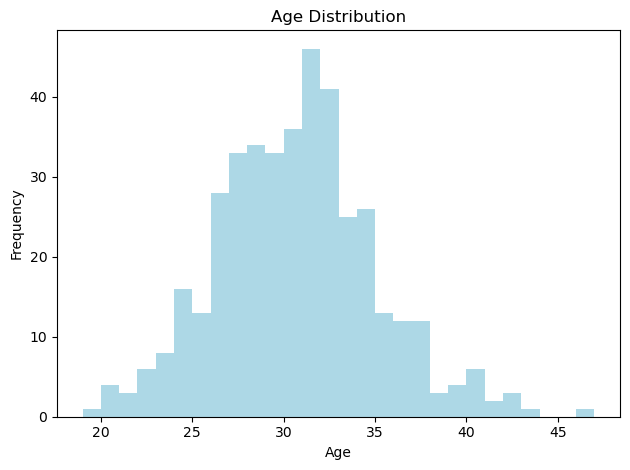

In [366]:
#Age
bins = np.arange(df['Age'].min(), df['Age'].max()+1, 1)
plt.hist(df['Age'], color = "lightblue", bins=bins)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

In [8]:
#marital status
df['Marital_status_edit'].value_counts()

2.0    389
1.0     14
3.0      7
Name: Marital_status_edit, dtype: int64

In [9]:
conditions = [
    (df['Marital_status_edit'] == 1),
    (df['Marital_status_edit'] == 2),
    (df['Marital_status_edit'] == 3)
    ]
values = ['single', 'in a relationship', 'separated/divorced/widow']
Marital_status = np.select(conditions, values)

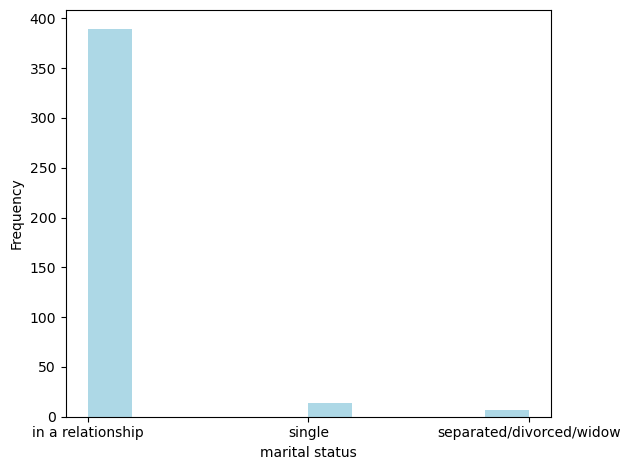

In [10]:
status = ['single', 'in a relationship', 'separated']
plt.hist(Marital_status, color = "lightblue")
plt.xlabel("marital status")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [11]:
#education
#1 = no education ; 2 = compulsory school ; 3 = post-compulsory education (e.g., apprenticeship) ; 4 = university of Applied Science or University Technology Degree ; 5 = university. 
#No education and compulsory school were merged into the category "Compulsory education or lower school or less".
#Preschool (écoles maternelles) – ages three to six
#Primary school (école élémentaire) – ages six to 11
#Middle school (collège) – ages 11 to 15
#High school (lycée) – ages 15 to 18
df['Education'].value_counts()

5.0    192
3.0    103
4.0     88
2.0     25
1.0      2
Name: Education, dtype: int64

In [370]:
conditions = [
    (df['Education'] == 1),
    (df['Education'] == 2),
    (df['Education'] == 3),
    (df['Education'] == 4),
    (df['Education'] == 5)
    ]
values = ['no education', 'compulsory school', 'apprenticeship', 'University Technology Degree', 'university']
education_level = np.select(conditions, values)

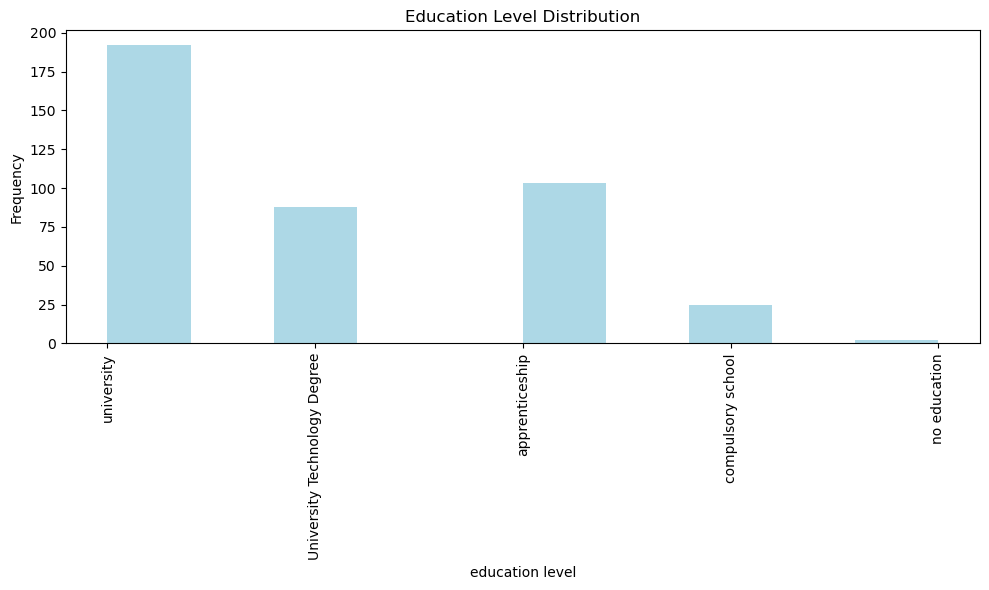

In [372]:
#status = ['single', 'in a relationship', 'separated']
plt.figure(figsize=(10,6))
plt.hist(education_level, color = "lightblue")
plt.xlabel("education level")
plt.ylabel("Frequency")
plt.title('Education Level Distribution')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [12]:
df['Birth_1mth_M_inclusion'].value_counts()

1.0    410
Name: Birth_1mth_M_inclusion, dtype: int64

In [13]:
df['Birth_12mth_M_inclusion'].value_counts()

1.0    410
Name: Birth_12mth_M_inclusion, dtype: int64

### Baby

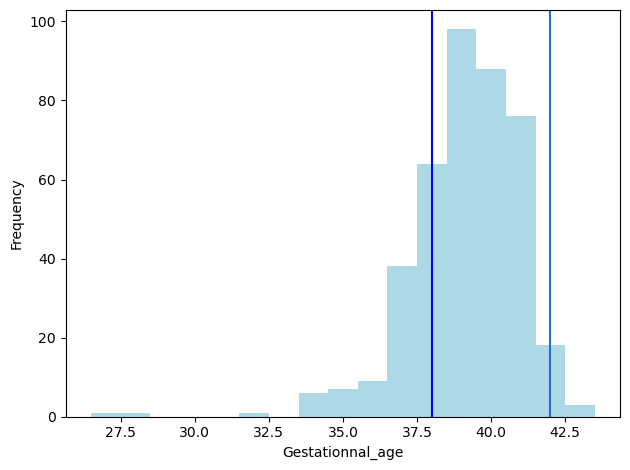

In [14]:
#Gestationnal age
bins_w = np.arange(df['Gestationnal_age'].min(), df['Gestationnal_age'].max()+1, 1)
plt.hist(df['Gestationnal_age'], color = "lightblue", bins=bins_w)
plt.xlabel("Gestationnal_age")
plt.ylabel("Frequency")
plt.axvline(x=38, color='b', label='axvline - full height')
plt.axvline(x=42)
plt.tight_layout()
plt.show()

In [15]:
#sex of baby
#1 = girl; 2 = boy
df['sex_baby1'].value_counts()

1.0    212
2.0    198
Name: sex_baby1, dtype: int64

In [16]:
#age of baby
#1 = ≥3 months to <6 months; 2 = ≥6 months to <9 months; 3 = ≥9 months to <12 months
df['Age_bb'].value_counts()

1.0    147
2.0    133
3.0    130
Name: Age_bb, dtype: int64

In [374]:
#the Very Short Form of the Infant Behavior Questionnaire-Revised (Negative Emotionality dimension)
print(len([col for col in df if col.startswith('IBQ')]))
[col for col in df if col.startswith('IBQ')]


10


['IBQ_R_VSF_3_bb1',
 'IBQ_R_VSF_4_bb1',
 'IBQ_R_VSF_9_bb1',
 'IBQ_R_VSF_10_bb1',
 'IBQ_R_VSF_16_bb1',
 'IBQ_R_VSF_17_bb1',
 'IBQ_R_VSF_28_bb1',
 'IBQ_R_VSF_29_bb1',
 'IBQ_R_VSF_32_bb1',
 'IBQ_R_VSF_33_bb1']

3. How often did your baby show distress when he/she was tired?
4. How often did your baby cling to a parent when introduced to an unfamiliar adult?
9. When it was time for bed or nap and your baby didn't want to go, how often did he/she whine or sob?
10. After waking up, how often did your baby cry if no one came quickly?
16. How often did your baby seem angry (crying and fussing) when you put him/her to bed?
17. How often in the past week was your baby startled by a sudden change in body position (such as being suddenly moved)?
28. When introduced to an unfamiliar adult, how often did your baby refuse to go to that person?
29. When you were occupied with another activity and your baby couldn't get your attention, how often did he/she cry?
32. When your baby wanted something, how often did he/she become upset when he/she couldn't get it?
33. When in the presence of several unfamiliar adults, how often did your baby cling to a parent?

In [18]:
for col in [col for col in df if col.startswith('IBQ')]:
    print(col)
    print(df[col].value_counts(normalize=True))

IBQ_R_VSF_3_bb1
2.0    0.256790
3.0    0.170370
6.0    0.153086
1.0    0.118519
4.0    0.113580
5.0    0.108642
7.0    0.079012
Name: IBQ_R_VSF_3_bb1, dtype: float64
IBQ_R_VSF_4_bb1
1.0    0.265252
2.0    0.225464
6.0    0.151194
3.0    0.106101
7.0    0.103448
4.0    0.079576
5.0    0.068966
Name: IBQ_R_VSF_4_bb1, dtype: float64
IBQ_R_VSF_9_bb1
2.0    0.255319
6.0    0.194149
3.0    0.132979
7.0    0.119681
5.0    0.111702
4.0    0.101064
1.0    0.085106
Name: IBQ_R_VSF_9_bb1, dtype: float64
IBQ_R_VSF_10_bb1
2.0    0.330667
1.0    0.154667
3.0    0.125333
6.0    0.109333
7.0    0.101333
4.0    0.090667
5.0    0.088000
Name: IBQ_R_VSF_10_bb1, dtype: float64
IBQ_R_VSF_16_bb1
2.0    0.329949
3.0    0.187817
1.0    0.142132
6.0    0.134518
4.0    0.091371
5.0    0.071066
7.0    0.043147
Name: IBQ_R_VSF_16_bb1, dtype: float64
IBQ_R_VSF_17_bb1
2.0    0.370821
1.0    0.276596
3.0    0.151976
4.0    0.079027
5.0    0.054711
6.0    0.054711
7.0    0.012158
Name: IBQ_R_VSF_17_bb1, dtype: float6

In [19]:
#infant sleep duration
#Brief Infant Sleep Questionnaire assessing nocturnal sleep duration (between 7pm and 7 am)
df['Sleep_night_duration_bb1'].value_counts()

10:00    116
11:00     79
12:00     72
09:00     39
10:30     32
08:00     22
07:00     15
09:30     10
11:30     10
06:00      6
05:00      3
07:30      2
08:30      2
11:15      1
99:99      1
Name: Sleep_night_duration_bb1, dtype: int64

In [20]:
df.drop(df[df['Sleep_night_duration_bb1']=='99:99'].index, inplace=True)


In [21]:
#Brief Infant Sleep Questionnaire assessing the number of night waking 
#Average number of awakenings during the night?
df['night_awakening_number_bb1'].value_counts()

0.0     134
1.0     121
2.0      77
3.0      36
4.0      17
5.0      16
6.0       4
10.0      2
8.0       1
7.0       1
Name: night_awakening_number_bb1, dtype: int64

In [22]:
age_awake = df.groupby(["Age_bb", "night_awakening_number_bb1"]).agg({'night_awakening_number_bb1': 'sum'})
age_awake.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

#df.groupby(["Age_bb", "night_awakening_number_bb1"]).size()

/var/folders/50/cr_04dgs14bf0wgx8frly6s40000gn/T/ipykernel_98820/2666799892.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  age_awake.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))


night_awakening_number_bb1
Age_bb night_awakening_number_bb1                            
1.0    0.0                                           0.000000
       1.0                                          16.894977
       2.0                                          30.136986
       3.0                                          19.178082
       4.0                                           9.132420
       5.0                                          15.981735
       6.0                                           5.479452
       7.0                                           3.196347
2.0    0.0                                           0.000000
       1.0                                          30.952381
       2.0                                          27.380952
       3.0                                          17.857143
       4.0                                          14.285714
       5.0                                           5.952381
       6.0                                           3.571429
3.0    0.0                                           0.000000
       1.0                                          15.763547
       2.0                                          20.689655
       3.0                                          17.733990
       4.0                                          11.822660
       5.0                                          17.241379
       6.0                                           2.955665
       8.0                                           3.940887
       10.0                                          9.852217

In [23]:
#Brief Infant Sleep Questionnaire assessing how the infant fall asleep
#1 = while being fed; 2 =while being rocked; 3 = while being held; 4 = alone in the crib; 5 =in the crib with parental presence
df['how_falling_asleep_bb1'].value_counts()

4.0    176
1.0     90
2.0     74
5.0     47
3.0     22
Name: how_falling_asleep_bb1, dtype: int64

## Mother

In [24]:
#Type of pregnancy (single or twin)
df['Type_pregnancy'].value_counts()

1.0    404
2.0      5
Name: Type_pregnancy, dtype: int64

In [375]:
#maternal City Birth Trauma Scale - French version 
print(len([col for col in df if col.startswith('CBTS')]))
[col for col in df if col.startswith('CBTS')]

20


['CBTS_M_3',
 'CBTS_M_4',
 'CBTS_M_5',
 'CBTS_M_6',
 'CBTS_M_7',
 'CBTS_M_8',
 'CBTS_M_9',
 'CBTS_M_10',
 'CBTS_M_11',
 'CBTS_M_12',
 'CBTS_13',
 'CBTS_14',
 'CBTS_15',
 'CBTS_16',
 'CBTS_17',
 'CBTS_18',
 'CBTS_19',
 'CBTS_20',
 'CBTS_21',
 'CBTS_22']

3. Repeated and involuntary memories of the birth (or parts of the birth) that you cannot control
4. Bad dreams or nightmares about the birth, or related to the birth
5. Flashbacks of the birth and/or reliving the experience
6. Being disturbed when something reminds you of the birth
7. Being tense or anxious when something reminds you of the birth
8. Trying to avoid thinking about the subject of the birth
9. Trying to avoid things that remind you of the birth (e.g., people, places, TV programs, etc.)
10. Unable to remember details of the birth
11. Blaming yourself or others for what happened during the birth
12. Experiencing intense negative emotions about the birth (e.g., fear, anger, shame)
13. Having negative beliefs about yourself, or fearing that something terrible will happen
14. Losing interest in activities that were important to you before
15. Feeling detached from others
16. Unable to feel positive emotions (e.g., joy, excitement)
17. Feeling irritable or aggressive
18. Feeling self-destructive, or acting recklessly
19. Feeling tense and on edge
20. Feeling restless or easily startled
21. Having difficulty concentrating
22. Sleeping poorly due to things unrelated to the baby's sleep schedule.

In [26]:
for col in [col for col in df if col.startswith('CBTS')]:
    print(col)
    print(df[col].value_counts(normalize=True))

CBTS_M_3
0.0    0.684597
1.0    0.141809
2.0    0.134474
3.0    0.039120
Name: CBTS_M_3, dtype: float64
CBTS_M_4
0.0    0.867971
1.0    0.070905
2.0    0.046455
3.0    0.014670
Name: CBTS_M_4, dtype: float64
CBTS_M_5
0.0    0.559902
1.0    0.217604
2.0    0.156479
3.0    0.066015
Name: CBTS_M_5, dtype: float64
CBTS_M_6
0.0    0.679707
1.0    0.176039
2.0    0.110024
3.0    0.034230
Name: CBTS_M_6, dtype: float64
CBTS_M_7
0.0    0.765281
1.0    0.132029
2.0    0.073350
3.0    0.029340
Name: CBTS_M_7, dtype: float64
CBTS_M_8
0.0    0.811736
1.0    0.078240
2.0    0.061125
3.0    0.048900
Name: CBTS_M_8, dtype: float64
CBTS_M_9
0.0    0.867971
1.0    0.061125
2.0    0.048900
3.0    0.022005
Name: CBTS_M_9, dtype: float64
CBTS_M_10
0.0    0.699267
1.0    0.195599
2.0    0.080685
3.0    0.024450
Name: CBTS_M_10, dtype: float64
CBTS_M_11
0.0    0.748166
1.0    0.102689
2.0    0.100244
3.0    0.048900
Name: CBTS_M_11, dtype: float64
CBTS_M_12
0.0    0.691932
1.0    0.144254
2.0    0.090465
3.

In [376]:
#Edinburgh Postnatal Depression Scale
print(len([col for col in df if col.startswith('EPDS')]))
[col for col in df if col.startswith('EPDS')]

10


['EPDS_1',
 'EPDS_2',
 'EPDS_3',
 'EPDS_4',
 'EPDS_5',
 'EPDS_6',
 'EPDS_7',
 'EPDS_8',
 'EPDS_9',
 'EPDS_10']

1. I was able to laugh and take things in stride:
2. I felt confident and joyful when thinking about the future:
3. I blamed myself, without reason, for things going wrong:
4. I felt worried or anxious without reason:
5. I felt scared or panicked without really knowing why:
6. I tended to feel overwhelmed by events:
7. I felt so unhappy that I had trouble sleeping:
8. I felt sad or not very happy:
9. I felt so unhappy that I cried:
10. I have thought about hurting myself:

In [28]:
for col in [col for col in df if col.startswith('EPDS')]:
    print(col)
    print(df[col].value_counts(normalize=True))

EPDS_1
0.0    0.633252
1.0    0.237164
2.0    0.124694
3.0    0.004890
Name: EPDS_1, dtype: float64
EPDS_2
0.0    0.618582
1.0    0.249389
2.0    0.088020
3.0    0.044010
Name: EPDS_2, dtype: float64
EPDS_3
2.0    0.337408
0.0    0.264059
1.0    0.212714
3.0    0.185819
Name: EPDS_3, dtype: float64
EPDS_4
2.0    0.378973
0.0    0.246944
1.0    0.210269
3.0    0.163814
Name: EPDS_4, dtype: float64
EPDS_5
0.0    0.486553
2.0    0.264059
1.0    0.185819
3.0    0.063570
Name: EPDS_5, dtype: float64
EPDS_6
2.0    0.408313
1.0    0.278729
0.0    0.183374
3.0    0.129584
Name: EPDS_6, dtype: float64
EPDS_7
0.0    0.574572
1.0    0.176039
2.0    0.171149
3.0    0.078240
Name: EPDS_7, dtype: float64
EPDS_8
0.0    0.403423
1.0    0.383863
2.0    0.139364
3.0    0.073350
Name: EPDS_8, dtype: float64
EPDS_9
0.0    0.452323
1.0    0.366748
2.0    0.117359
3.0    0.063570
Name: EPDS_9, dtype: float64
EPDS_10
0.0    0.848411
2.0    0.058680
1.0    0.056235
3.0    0.036675
Name: EPDS_10, dtype: float6

In [377]:
#Hospital Anxiety and Depression Scale (anxiety subscale)
print(len([col for col in df if col.startswith('HADS')]))
[col for col in df if col.startswith('HADS')]

7


['HADS_1', 'HADS_3', 'HADS_5', 'HADS_7', 'HADS_9', 'HADS_11', 'HADS_13']

1. I feel tense or agitated:
3. I have a feeling of fear as if something horrible is going to happen to me:
5. I worry:
7. I can sit quietly and feel relaxed:
9. I feel scared and have a knot in my stomach:
11. I am restless and can't sit still:
13. I have sudden sensations of panic:

In [30]:
for col in [col for col in df if col.startswith('HADS')]:
    print(col)
    print(df[col].value_counts(normalize=True))

HADS_1
1.0    0.488998
2.0    0.242054
0.0    0.156479
3.0    0.112469
Name: HADS_1, dtype: float64
HADS_3
0.0    0.572127
1.0    0.215159
2.0    0.136919
3.0    0.075795
Name: HADS_3, dtype: float64
HADS_5
1.0    0.349633
2.0    0.303178
3.0    0.237164
0.0    0.110024
Name: HADS_5, dtype: float64
HADS_7
1.0    0.432763
2.0    0.349633
3.0    0.127139
0.0    0.090465
Name: HADS_7, dtype: float64
HADS_9
0.0    0.493888
1.0    0.354523
2.0    0.107579
3.0    0.044010
Name: HADS_9, dtype: float64
HADS_11
1.0    0.310513
0.0    0.278729
2.0    0.249389
3.0    0.161369
Name: HADS_11, dtype: float64
HADS_13
0.0    0.552567
1.0    0.288509
2.0    0.114914
3.0    0.044010
Name: HADS_13, dtype: float64


## Feature engineering

In [379]:
#create gestational age categorcal column 
#<38 weeks OR >42 weeks = 0, 38-42 weeks = 1
conditions = [
    (df['Gestationnal_age'] < 38),
    (df['Gestationnal_age'] >= 38)&(df['Gestationnal_age'] <= 42),
    (df['Gestationnal_age'] >42)]

values = ['0', '1', '0']
df['Gestational_age_cat'] = np.select(conditions, values)
df['Gestational_age_cat'].value_counts()

1    335
0     75
Name: Gestational_age_cat, dtype: int64

In [380]:
mother_cols = [col for col in df if col.startswith('CBTS')] + [col for col in df if col.startswith('EPDS')] + [col for col in df if col.startswith('HADS')]

In [381]:
#create new column CBTS overall to summarize all CBTS item score
df['CBTS'] = df[[col for col in df if col.startswith('CBTS')]].sum(axis=1)
df['CBTS']

0       6.0
1       0.0
2       9.0
3      14.0
4       3.0
       ... 
405     3.0
406     8.0
407     0.0
408     0.0
409     6.0
Name: CBTS, Length: 410, dtype: float64

In [382]:
#create new column EPDS overall to summarize all EPDS item score
#some are negative statements, some are positive statements
df['EPDS'] = -df['EPDS_1'] - df['EPDS_2'] + df['EPDS_3'] + df['EPDS_4'] +df['EPDS_5'] + df['EPDS_6'] + df['EPDS_7'] + df['EPDS_8'] + df['EPDS_9'] + df['EPDS_10']
df['EPDS']

0       7.0
1       0.0
2       6.0
3      12.0
4       3.0
       ... 
405     4.0
406     9.0
407     3.0
408     0.0
409     7.0
Name: EPDS, Length: 410, dtype: float64

In [383]:
#create new column HADS overall to summarize all HADS item score
df['HADS'] = df[[col for col in df if col.startswith('HADS')]].sum(axis=1)
df['HADS']

0       9.0
1       3.0
2       9.0
3      13.0
4       3.0
       ... 
405     4.0
406    14.0
407     3.0
408     4.0
409     7.0
Name: HADS, Length: 410, dtype: float64

In [384]:
#create new column IBQ overall to summarize all IBQ item score (negative emotionality dimension)
df['IBQ'] = df[[col for col in df if col.startswith('IBQ')]].sum(axis=1)
df['IBQ']

0      33.0
1      25.0
2      17.0
3      18.0
4      39.0
       ... 
405    28.0
406    24.0
407    19.0
408    14.0
409    24.0
Name: IBQ, Length: 410, dtype: float64

In [385]:
#convert Sleep_night_duration_bb1 column to float column in hours
df['sleep_duration_hr'] = df['Sleep_night_duration_bb1'].str[0:2].astype(float) + df['Sleep_night_duration_bb1'].str[3:5].astype(float) / 60
df['sleep_duration_hr']

0      10.0
1      11.0
2      12.0
3      11.0
4      10.5
       ... 
405     9.0
406    12.0
407    10.0
408    11.5
409    12.0
Name: sleep_duration_hr, Length: 410, dtype: float64

In [386]:
df['sleep_duration'] = pd.cut(df['sleep_duration_hr'], bins=3, labels=['-1', '0', '1'])
df['sleep_duration'] = df['sleep_duration'].astype(float)
df.loc[df['sleep_duration'] == -1, 'sleep_duration'] = 1
df['sleep_duration'].value_counts()


1.0    410
Name: sleep_duration, dtype: int64

In [387]:
#convert night_awakening_number_bb1 column to cateogircal column where <=3 is 0 (normal), >2 is 1 (too many)

df['night_awakening'] = np.where(df['night_awakening_number_bb1']>2, 1, 0)
df['night_awakening']

0      1
1      0
2      0
3      0
4      0
      ..
405    0
406    0
407    0
408    0
409    0
Name: night_awakening, Length: 410, dtype: int64

In [388]:
df['IBQ_cat'] = np.where(df['IBQ']<df['IBQ'].median(), 0, 1)
df['IBQ_cat']

0      1
1      0
2      0
3      0
4      1
      ..
405    0
406    0
407    0
408    0
409    0
Name: IBQ_cat, Length: 410, dtype: int64

In [390]:
#responses 1, 2, 3, and 5 were grouped as interactive method of falling asleep, while the non-interactive method of falling asleep only included response 4
#0 is good, 1 is "bad" sleep habit
conditions = [
    (df['how_falling_asleep_bb1'] == 4),
    (df['how_falling_asleep_bb1'] != 4)]

values = ['0', '1']
df['how_asleep'] = np.select(conditions, values)
df['how_asleep'].value_counts()

1    233
0    177
Name: how_asleep, dtype: int64

Final features:

df[['Age', 'Marital_status_edit', 'Gestational_age_cat', 'Education', 'CBTS', 'EPDS', 'HADS']]


## Model

In [393]:
df

,Age,Marital_status_edit,Education,Gestational_age_cat,CBTS,EPDS,HADS,IBQ_cat,sleep_duration,night_awakening,...,EPDS_8,EPDS_9,EPDS_10,HADS_1,HADS_3,HADS_5,HADS_7,HADS_9,HADS_11,HADS_13
0,34.0,2.0,5.0,0,6.0,7.0,9.0,1,1.0,1,...,2.0,2.0,0.0,2.0,1.0,2.0,2.0,0.0,1.0,1.0
1,33.0,2.0,5.0,1,0.0,0.0,3.0,0,1.0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37.0,2.0,5.0,1,9.0,6.0,9.0,0,1.0,0,...,1.0,1.0,0.0,2.0,1.0,1.0,2.0,0.0,3.0,0.0
3,31.0,2.0,5.0,0,14.0,12.0,13.0,0,1.0,0,...,2.0,1.0,1.0,1.0,3.0,3.0,1.0,2.0,2.0,1.0
4,36.0,1.0,5.0,1,3.0,3.0,3.0,1,1.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,31.0,2.0,3.0,1,3.0,4.0,4.0,0,1.0,0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0
406,26.0,2.0,2.0,0,8.0,9.0,14.0,0,1.0,0,...,1.0,1.0,0.0,2.0,3.0,3.0,0.0,2.0,3.0,1.0
407,26.0,2.0,5.0,1,0.0,3.0,3.0,0,1.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
408,27.0,2.0,5.0,1,0.0,0.0,4.0,0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0


### Random forest: Predict infant method of falling asleep using maternal demographic and mental health information


In [394]:
X = df[['Age', 'Marital_status_edit', 'Gestational_age_cat', 'Education', 'CBTS', 'EPDS', 'HADS']]
y = df['how_asleep']

scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train.shape, X_test.shape

((328, 7), (82, 7))

In [395]:
rf = RandomForestClassifier()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [396]:

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Evaluate the performance of the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [402]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [397]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.5609756097560976
              precision    recall  f1-score   support

           0       0.52      0.32      0.40        37
           1       0.58      0.76      0.65        45

    accuracy                           0.56        82
   macro avg       0.55      0.54      0.53        82
weighted avg       0.55      0.56      0.54        82



In [401]:
feature_importances = pd.DataFrame(best_model.feature_importances_,
                                       index = X_train.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                     importance
CBTS                   0.246647
HADS                   0.213342
Age                    0.209088
EPDS                   0.206486
Education              0.076838
Gestational_age_cat    0.032740
Marital_status_edit    0.014860


### Gaussian NB: Predict infant method of falling asleep using maternal demographic and mental health information


In [405]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


# Define the Naive Bayes model
nb_model = GaussianNB()

# Define the parameter grid for hyperparameter tuning
param_grid = {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Evaluate the performance of the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = metrics.classification_report(y_test, y_pred)
print('Classification Report:', report)

Accuracy: 0.5121951219512195
Classification Report:               precision    recall  f1-score   support

           0       0.44      0.30      0.35        37
           1       0.54      0.69      0.61        45

    accuracy                           0.51        82
   macro avg       0.49      0.49      0.48        82
weighted avg       0.50      0.51      0.49        82



### XGBoost model: Predict infant high or low negative emotionality dimension using maternal demographic and mental health information

In [408]:
#Analyzing how parenting strategies impact the relationship between maternal mental health difficulties and infant sleep behaviors over time
X = df[['Age', 'Marital_status_edit', 'Gestational_age_cat','Education', 'CBTS', 'EPDS', 'HADS']]
#X = df[['Age', 'Marital_status_edit', 'Education']+mother_cols]
#X = df[['Age', 'Marital_status_edit', 'Education', 'maternal_MH_cat']]
y = df['IBQ_cat']

scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train.shape, X_test.shape

((328, 7), (82, 7))

In [358]:
# define the XGBoost model
model = xgb.XGBClassifier()

# define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1.0],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0]
}

# define the GridSearchCV object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='precision')

# fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
# Evaluate the performance of the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = metrics.classification_report(y_test, y_pred)
print('Classification Report:', report)

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 1.0, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.5609756097560976
Classification Report:               precision    recall  f1-score   support

           0       0.62      0.57      0.59        46
           1       0.50      0.56      0.53        36

    accuracy                           0.56        82
   macro avg       0.56      0.56      0.56        82
weighted avg       0.57      0.56      0.56        82



### GaussianNB model: Predict infant high or low negative emotionality dimension using maternal demographic and mental health information

In [409]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

nb_model = GaussianNB()

param_grid = {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}

grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = metrics.classification_report(y_test, y_pred)
print('Classification Report:', report)

Accuracy: 0.4634146341463415
Classification Report:               precision    recall  f1-score   support

           0       0.59      0.47      0.52        51
           1       0.34      0.45      0.39        31

    accuracy                           0.46        82
   macro avg       0.46      0.46      0.46        82
weighted avg       0.49      0.46      0.47        82



In [410]:
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'var_smoothing': 1e-09}


### SVM model: Predict infant high or low negative emotionality dimension using maternal demographic and mental health information

In [360]:
svm_model = SVC()

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = metrics.classification_report(y_test, y_pred)
print('Classification Report:', report)

Best hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.5609756097560976
Classification Report:               precision    recall  f1-score   support

           0       0.66      0.46      0.54        46
           1       0.50      0.69      0.58        36

    accuracy                           0.56        82
   macro avg       0.58      0.58      0.56        82
weighted avg       0.59      0.56      0.56        82



### XGBoost model: Predict infant normal or abnormal(?) sleep length at night using maternal demographic and mental health information

In [354]:
X = df[['Age', 'Marital_status_edit', 'Gestational_age_cat', 'Education', 'CBTS', 'EPDS', 'HADS']]
y = df['sleep_duration']

scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
X_train.shape, X_test.shape

((327, 7), (82, 7))

In [355]:
# define the XGBoost model
model = xgb.XGBClassifier()

# define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1.0],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0]
}

# define the GridSearchCV object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='precision')

# fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'colsample_bytree': 0.5, 'learning_rate': 1.0, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}


In [356]:
# Evaluate the performance of the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = metrics.classification_report(y_test, y_pred)
print('Classification Report:', report)

Accuracy: 0.7804878048780488
Classification Report:               precision    recall  f1-score   support

         0.0       0.36      0.27      0.31        15
         1.0       0.85      0.90      0.87        67

    accuracy                           0.78        82
   macro avg       0.60      0.58      0.59        82
weighted avg       0.76      0.78      0.77        82

